In [44]:
import os
import imageio 
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd

from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
os.chdir('D:/Solar System/')

In [45]:
# # Rename all the fits file in order
# import os
# os.chdir('D:/Solar System/data_fit')
# i=1
# for file in os.listdir():
#     src=file
#     new_name="6 Hebe-Bin2-"+str(i)+"L"+".fit"
#     os.rename(src,new_name)
#     i+=1

In [46]:
fits_files = []
for i in range(1,45):
    fits_files.append(f'data_fit/6 Hebe-Bin2-{i}L.fit')
print(fits_files)

['data_fit/6 Hebe-Bin2-1L.fit', 'data_fit/6 Hebe-Bin2-2L.fit', 'data_fit/6 Hebe-Bin2-3L.fit', 'data_fit/6 Hebe-Bin2-4L.fit', 'data_fit/6 Hebe-Bin2-5L.fit', 'data_fit/6 Hebe-Bin2-6L.fit', 'data_fit/6 Hebe-Bin2-7L.fit', 'data_fit/6 Hebe-Bin2-8L.fit', 'data_fit/6 Hebe-Bin2-9L.fit', 'data_fit/6 Hebe-Bin2-10L.fit', 'data_fit/6 Hebe-Bin2-11L.fit', 'data_fit/6 Hebe-Bin2-12L.fit', 'data_fit/6 Hebe-Bin2-13L.fit', 'data_fit/6 Hebe-Bin2-14L.fit', 'data_fit/6 Hebe-Bin2-15L.fit', 'data_fit/6 Hebe-Bin2-16L.fit', 'data_fit/6 Hebe-Bin2-17L.fit', 'data_fit/6 Hebe-Bin2-18L.fit', 'data_fit/6 Hebe-Bin2-19L.fit', 'data_fit/6 Hebe-Bin2-20L.fit', 'data_fit/6 Hebe-Bin2-21L.fit', 'data_fit/6 Hebe-Bin2-22L.fit', 'data_fit/6 Hebe-Bin2-23L.fit', 'data_fit/6 Hebe-Bin2-24L.fit', 'data_fit/6 Hebe-Bin2-25L.fit', 'data_fit/6 Hebe-Bin2-26L.fit', 'data_fit/6 Hebe-Bin2-27L.fit', 'data_fit/6 Hebe-Bin2-28L.fit', 'data_fit/6 Hebe-Bin2-29L.fit', 'data_fit/6 Hebe-Bin2-30L.fit', 'data_fit/6 Hebe-Bin2-31L.fit', 'data_fit/6 Hebe

In [47]:
fits_data=[]
datetimes=[]
for fits_file in fits_files:
    file=fits.open(fits_file)
    image_data=file[0].data
    header=file[0].header
    time= pd.to_datetime(header['DATE-OBS'])
    datetimes.append(time)
    fits_data.append(image_data)

In [48]:
header #Let's check the header of the last fit file

SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 3124 /fastest changing axis                           
NAXIS2  =                 2088 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2024-05-07T18:38:43.56' /YYYY-MM-DDThh:mm:ss observation, UT         
EXPTIME =   30.000000000000000 /Exposure time in seconds                        
EXPOSURE=   30.000000000000000 /Exposure time in seconds                        
SET-TEMP=   0.0000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP= -0.10000000000000001 /CCD temperature at start of exposure in C       
XPIXSZ  =   7.51999999999999

In [49]:
# # Create images
# filenames=[]
# for i in range(0,44):
#     fig = plt.figure(figsize=(12,8),dpi=150)
#     plt.imshow(fits_data[i], cmap='grey',norm=LogNorm(vmin=fits_data[i].min()*1.1, vmax=fits_data[i].min()*1.39))
#     plt.axis(False)

#     filename=f'images/figure{i+1}.png'
#     filenames.append(filename)
#     fig.savefig(filename,bbox_inches='tight')

#     plt.close('all')

In [50]:
# # Create .gif file
# with imageio.get_writer('my_animation.gif',fps=2) as writer:
#     for filename in filenames:
#         image=imageio.v2.imread(filename)
#         writer.append_data(image)

In [51]:
# Create a function to find the pixel position of the 6 Hebe and one background star 
def find_star(image):
    mean, median, std = sigma_clipped_stats(image, sigma=3.0)  
    daofind = DAOStarFinder(fwhm=8, threshold=5.*std)  # define the full width half maximum and threshold 
    sources = daofind(image - median) 
    sources.sort('peak', reverse=True)
    return [sources[0]['xcentroid'], sources[0]['ycentroid']], [sources[1]['xcentroid'], sources[1]['ycentroid']]

In [52]:
# We found that with the indices of 18, 20, 28, 29 in fits_data, the function find_star would be indicate the difference background star, so we should ignore them.
pos=[]
exclude_values = [18, 19, 20, 21, 28, 29, 30]
star1=find_star(fits_data[0])
for i in range(0,44):
    if i in exclude_values:
        continue  
    p=find_star(fits_data[i])
    pos.append(p)

In [53]:
rel_pos=[]
for i in range(1,37):
    rel=[pos[i][0][0]-(pos[i][1][0]-pos[0][1][0]), pos[i][0][1]-(pos[i][1][1]-pos[0][1][1])]
    rel_pos.append(rel)
rel_pos.insert(0,star1[0])

In [54]:
# Remove the corresponding datetime values of the excluded values
datetimes = [dt for i, dt in enumerate(datetimes) if i not in exclude_values]

(<matplotlib.patches.Circle at 0x1ea152a8800>,)

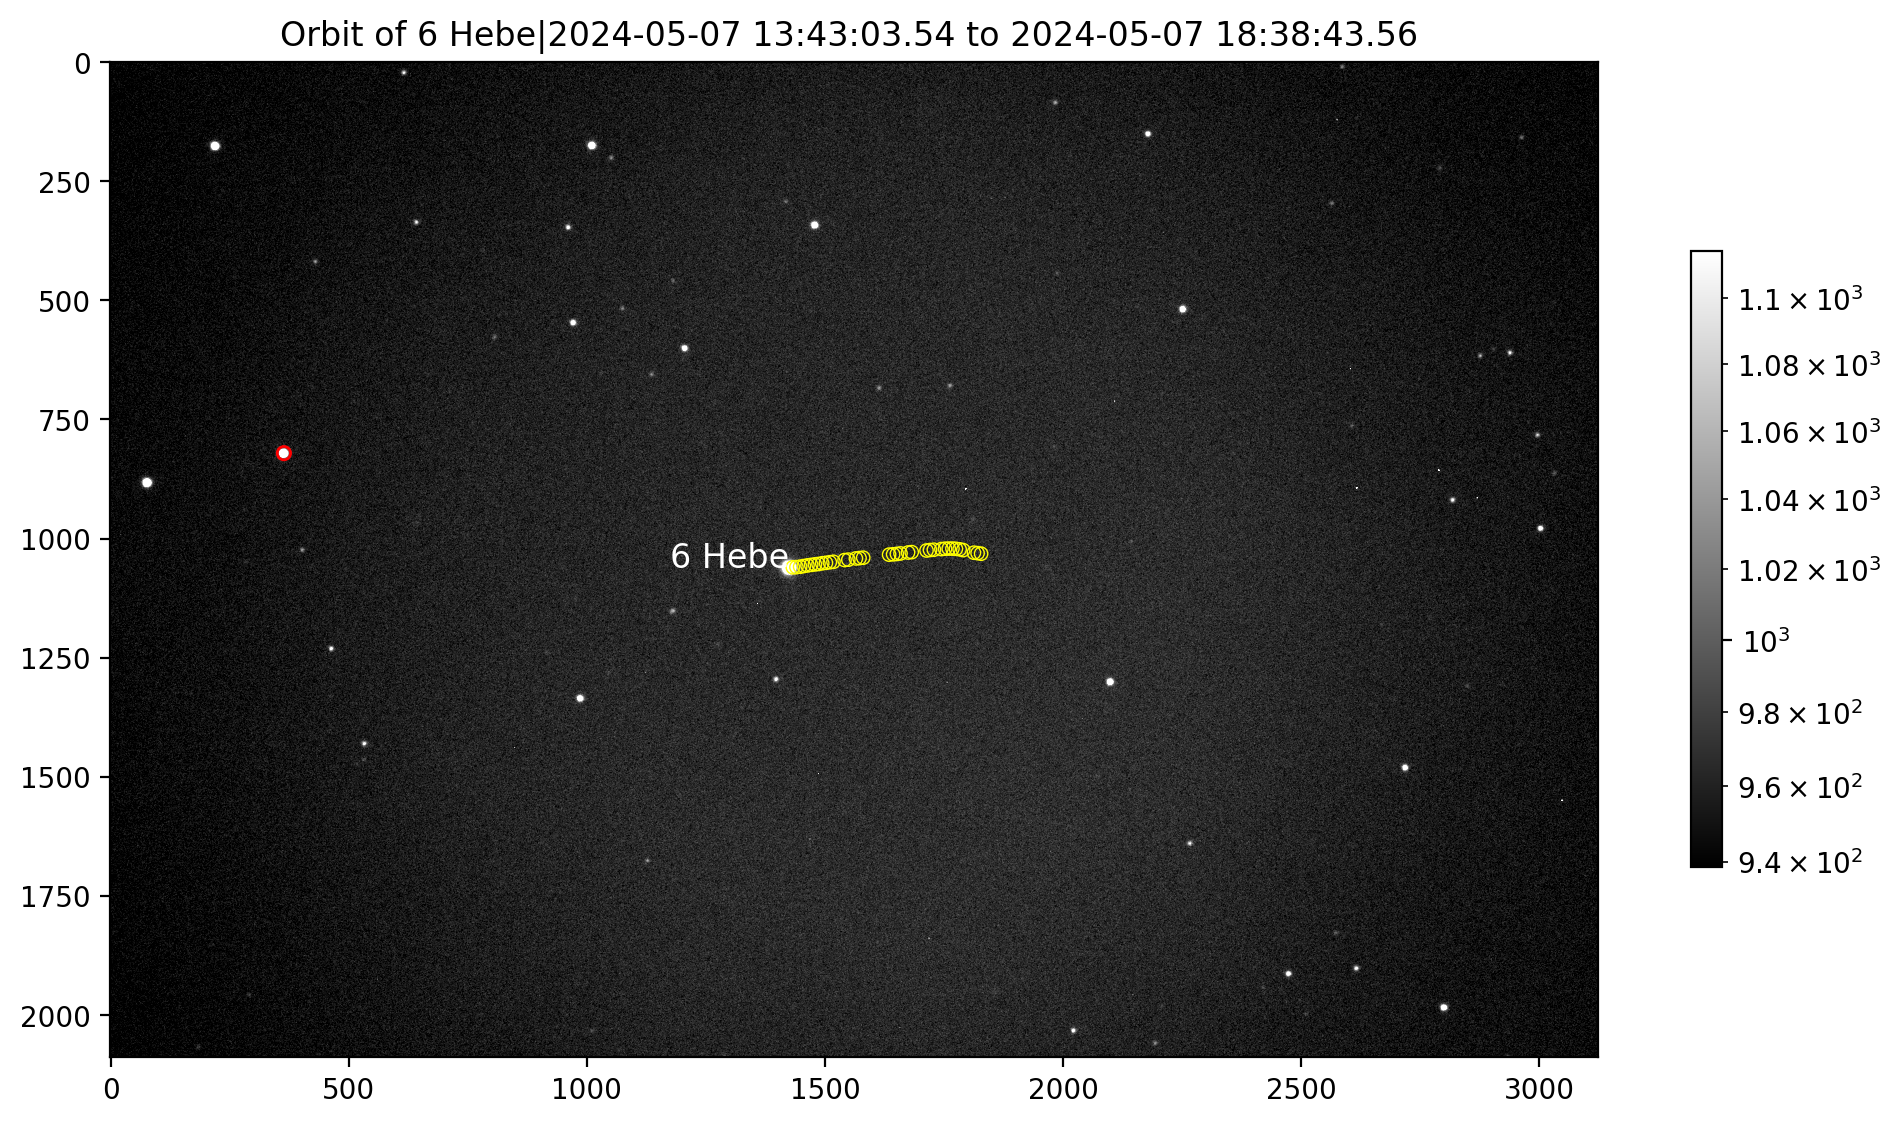

In [55]:
# PLot the orbit of the 6 Hebe asteroid relative to the background star
plt.figure(figsize=(12,8),dpi=200)
for i in range(1,37):
    aperture= CircularAperture(rel_pos[i],r=14)
    aperture.plot(color='yellow', lw=0.5)
plt.imshow(fits_data[0] ,cmap='grey',norm=LogNorm(vmin=fits_data[0].min()*1.12, vmax=fits_data[0].min()*1.33))
plt.text(star1[0][0], star1[0][1], '6 Hebe', color='white', fontsize=12, ha='right')
plt.colorbar(shrink=0.5)
plt.title('Orbit of 6 Hebe|2024-05-07 13:43:03.54 to 2024-05-07 18:38:43.56 ')
CircularAperture(star1[1],r=14).plot(color='red', lw=1) # The background star

In [56]:
pixel_size=  7.5199999999999996 # From from the header (micrometer)
foc= 3960 # focal length (mm)
# Calculate the sensor size of the camera
sensor_size = [1e-3*pixel_size* i for i in fits_data[0].shape] # [sensor height, sensor width]  (mm)
sensor_size

[15.70176, 23.49248]

In [57]:
# Calculate the field of view
fov=57.3/foc*sensor_size[1]
fov

0.33992906666666667

In [58]:
pixel_dist=[]  # The pixel distance between two positions of 6 Hebe in time (pixels)
velocity=[]  # The velocity (rad/s)
ang_dist=[]     # Angular distance (rad)

# Determine all the value
for i in range(1,37):
    dist=np.sqrt((rel_pos[i][0]-rel_pos[i-1][0])**2+(rel_pos[i][1]-rel_pos[i-1][1])**2)
    pixel_dist.append(dist)

    ang=dist*pixel_size*206.265*0.000277778*(1/foc) # in decimal degree
    ang_dist.append(ang)

    vel= ang/(datetimes[i]-datetimes[i-1]).total_seconds()
    velocity.append(vel)
    

In [59]:
# Shift to the data frame
pd.set_option('display.float_format', '{:.6e}'.format)
df=pd.DataFrame({'Distance move (decimal deg)':ang_dist, 'Velocity (rad/s)':velocity})
df.head()

,Distance move (decimal deg),Velocity (rad/s)
0,8.257756e-04,2.419784e-06
1,8.180174e-04,2.398034e-06
2,8.540595e-04,2.503692e-06
3,8.489348e-04,2.487867e-06
4,8.532563e-04,2.501264e-06


In [60]:
df.describe()

,Distance move (decimal deg),Velocity (rad/s)
count,3.600000e+01,3.600000e+01
mean,1.228220e-03,2.489966e-06
std,1.006065e-03,7.543845e-08
min,7.983737e-04,2.340380e-06
25%,8.385111e-04,2.452119e-06
50%,8.527384e-04,2.491114e-06
75%,8.927919e-04,2.521116e-06
max,5.951365e-03,2.717685e-06
